# Objetivos
## 1. AHAH Coroplético
Crea el siguiente mapa coroplético y, mientras sea posible, complemente con la figura que representa la dsitribución de los valores usando la estimación de densidad kernel (KDE):
- Intervalos iguales con 5 clases
- Cuantiles con cinco clases
- Fisher-jenks con cinco clases
- Valores únicos con la siguiente preparación:
    - Separa el LSOAs en dos clases: encima y debajo del promedio de puntación AHAH (Access to Healthy Assets and Hazards)
    - Asigna una equiqueta calitativa (encima/debajo= a cada LSOA
    - Crea un mapa de valor unico de acuerdo a las etiquetas creadas

## 2. Acercamiento de mapas
 Genera los siguientes mapas
 - Acercamiento al centro de liverpool con el mismo color para casa LSOA
 - Mapa de cuantiles de AHAH para todo Liverpool, con un zoom al norte del centro de la ciudad
 - Acercamiento al norte del centro de la ciudad con un mapa de cuantiles de AHAH solo para esta sección
 
 
## Enlaces de interes
https://pysal.org/mapclassify/notebooks/01_maximum_breaks.html

In [2]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
from pysal.lib import examples
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargamos los datos espaciales
lsoas = gpd.read_file("data/Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
# Visualizamos
lsoas.head()

,lsoa11cd,geometry
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38..."


In [29]:
# Cargamos la información tabular
ahah_data = pd.read_csv("data/Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/tables/E08000012.csv") 
# Visualizamos
ahah_data.head()

,lsoa11cd,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,e_exp,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
0,E01006512,Liverpool 031A,31239,3055,31351,35965,30.888481,1.725173,31.123073,43.744800,...,8,4,9,9,8,9,3,9,4,10
1,E01006513,Liverpool 060A,41456,2213,37636,35878,90.685995,1.236631,50.819353,43.429892,...,10,1,9,10,10,9,8,9,4,10
2,E01006514,Liverpool 037A,37258,4510,39228,35143,49.017998,2.594648,60.485044,40.928662,...,9,2,10,10,9,9,9,9,4,10
3,E01006515,Liverpool 037B,34254,6931,29900,35065,38.227117,4.118458,28.254809,40.678514,...,9,1,10,8,9,9,1,9,4,10
4,E01006518,Liverpool 044A,25433,7533,37244,34392,21.166678,4.513573,48.953916,38.626230,...,5,2,10,7,7,8,8,8,4,10


In [31]:
 #unimos la información espacial con la información tabular
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")
# Visualizamos
ahah.head()

,lsoa11cd,geometry,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",Liverpool 031A,31239,3055,31351,35965,30.888481,1.725173,31.123073,...,8,4,9,9,8,9,3,9,4,10
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",Liverpool 060A,41456,2213,37636,35878,90.685995,1.236631,50.819353,...,10,1,9,10,10,9,8,9,4,10
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",Liverpool 037A,37258,4510,39228,35143,49.017998,2.594648,60.485044,...,9,2,10,10,9,9,9,9,4,10
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",Liverpool 037B,34254,6931,29900,35065,38.227117,4.118458,28.254809,...,9,1,10,8,9,9,1,9,4,10
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",Liverpool 044A,25433,7533,37244,34392,21.166678,4.513573,48.953916,...,5,2,10,7,7,8,8,8,4,10


## 1. AHAH Coroplético
Crea el siguiente mapa coroplético y, mientras sea posible, complemente con la figura que representa la dsitribución de los valores usando la estimación de densidad kernel (KDE):
- Intervalos iguales con 5 clases
- Cuantiles con cinco clases
- Fisher-jenks con cinco clases
- Valores únicos con la siguiente preparación:
    - Separa el LSOAs en dos clases: encima y debajo del promedio de puntación AHAH (Access to Healthy Assets and Hazards)
    - Asigna una equiqueta calitativa (encima/debajo= a cada LSOA
    - Crea un mapa de valor unico de acuerdo a las etiquetas creadas

### Intervalos iguales

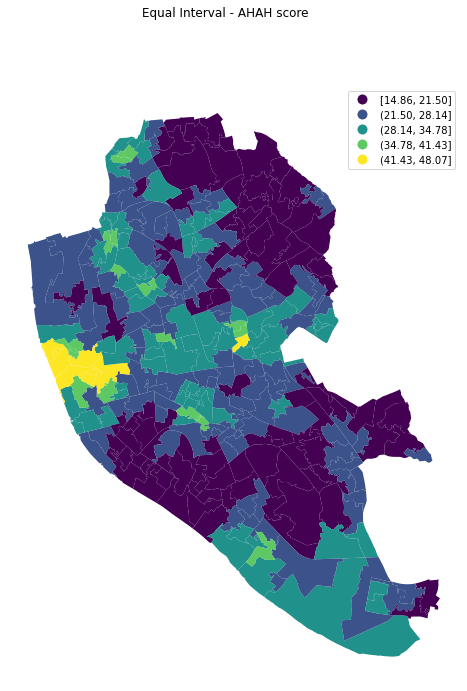

In [13]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("Equal Interval - AHAH score")
# Mostramos y editamos la representación de los elementos a mapear
ahah.plot(column="ahah", 
        scheme="equal_interval", 
        k=5,
        cmap="viridis",
        legend=True,
        ax=ax,) # donde se ubica la información
# Agregamos mapa base
# cx.add_basemap(ax, crs=liv.crs, source=cx.providers.Stamen.Watercolor);
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()

In [16]:
equal = mapclassify.EqualInterval(ahah["ahah"], k=5)
equal

EqualInterval         

   Interval      Count
----------------------
[14.86, 21.50] |    93
(21.50, 28.14] |   110
(28.14, 34.78] |    72
(34.78, 41.43] |    16
(41.43, 48.07] |     7

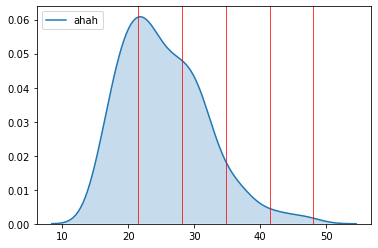

In [18]:
# Preparamos la gráfica
f, ax = plt.subplots(1)
# Graficamos la estimación de densidad kernel (kernel density estimation KDE)
sns.kdeplot(ahah["ahah"], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
# sns.rugplot(db["PCGDP2000"], alpha=0.5)
# Loop sobre cada punto de quiebre (clases) y trazo de línea roja
for cut in equal.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

### Cuantiles

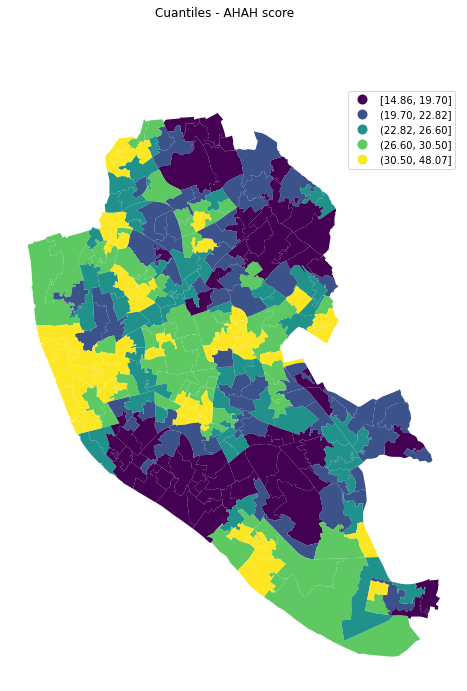

In [20]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("Cuantiles - AHAH score")
# Mostramos y editamos la representación de los elementos a mapear
ahah.plot(column="ahah", 
        scheme="quantiles", 
        k=5,
        cmap="viridis",
        legend=True,
        ax=ax,) # donde se ubica la información
# Agregamos mapa base
# cx.add_basemap(ax, crs=liv.crs, source=cx.providers.Stamen.Watercolor);
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()

In [21]:
quantiles = mapclassify.Quantiles(ahah["ahah"], k=5)
quantiles

Quantiles             

   Interval      Count
----------------------
[14.86, 19.70] |    60
(19.70, 22.82] |    59
(22.82, 26.60] |    60
(26.60, 30.50] |    59
(30.50, 48.07] |    60

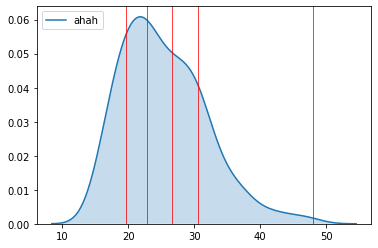

In [22]:
# Preparamos la gráfica
f, ax = plt.subplots(1)
# Graficamos la estimación de densidad kernel (kernel density estimation KDE)
sns.kdeplot(ahah["ahah"], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
# sns.rugplot(db["PCGDP2000"], alpha=0.5)
# Loop sobre cada punto de quiebre (clases) y trazo de línea roja
for cut in quantiles.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

### Fisher jenks

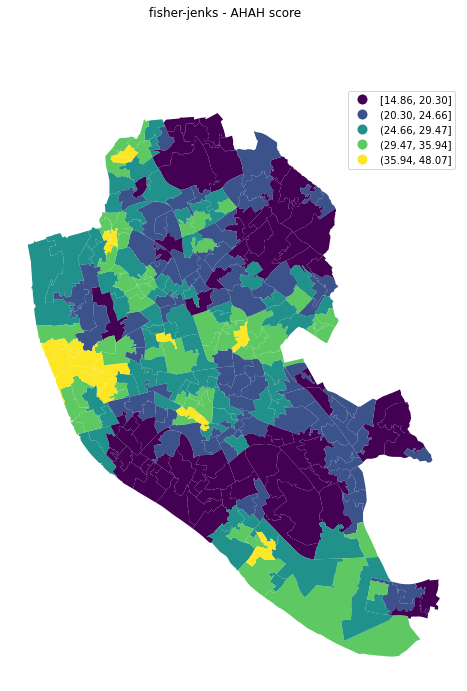

In [23]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("fisher-jenks - AHAH score")
# Mostramos y editamos la representación de los elementos a mapear
ahah.plot(column="ahah", 
        scheme="fisher_jenks", 
        k=5,
        cmap="viridis",
        legend=True,
        ax=ax,) # donde se ubica la información
# Agregamos mapa base
# cx.add_basemap(ax, crs=liv.crs, source=cx.providers.Stamen.Watercolor);
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()

In [25]:
fisher = mapclassify.FisherJenks(ahah["ahah"], k=5)
fisher

FisherJenks           

   Interval      Count
----------------------
[14.86, 20.30] |    72
(20.30, 24.66] |    82
(24.66, 29.47] |    69
(29.47, 35.94] |    56
(35.94, 48.07] |    19

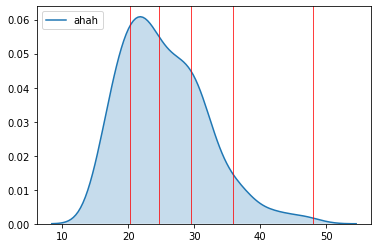

In [26]:
# Preparamos la gráfica
f, ax = plt.subplots(1)
# Graficamos la estimación de densidad kernel (kernel density estimation KDE)
sns.kdeplot(ahah["ahah"], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
# sns.rugplot(db["PCGDP2000"], alpha=0.5)
# Loop sobre cada punto de quiebre (clases) y trazo de línea roja
for cut in fisher.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

In [32]:
# Creamos una nueva columna la cual índicara si el valor de AHAH esta por encima o debajo del promedio
ahah["encima_debajo"] = "encima"
# Seleccionamos los valores de ahah que esten por debajo del valor promedio y les asiganmos el valor debajo,en la columna correspondiente
ahah.loc[ahah["ahah"] < ahah["ahah"].mean(),"encima_debajo"] = "debajo"
"Visualizamos"
ahah.head()

,lsoa11cd,geometry,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,...,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean,encima_debajo
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",Liverpool 031A,31239,3055,31351,35965,30.888481,1.725173,31.123073,...,4,9,9,8,9,3,9,4,10,encima
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",Liverpool 060A,41456,2213,37636,35878,90.685995,1.236631,50.819353,...,1,9,10,10,9,8,9,4,10,encima
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",Liverpool 037A,37258,4510,39228,35143,49.017998,2.594648,60.485044,...,2,10,10,9,9,9,9,4,10,encima
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",Liverpool 037B,34254,6931,29900,35065,38.227117,4.118458,28.254809,...,1,10,8,9,9,1,9,4,10,encima
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",Liverpool 044A,25433,7533,37244,34392,21.166678,4.513573,48.953916,...,2,10,7,7,8,8,8,4,10,encima


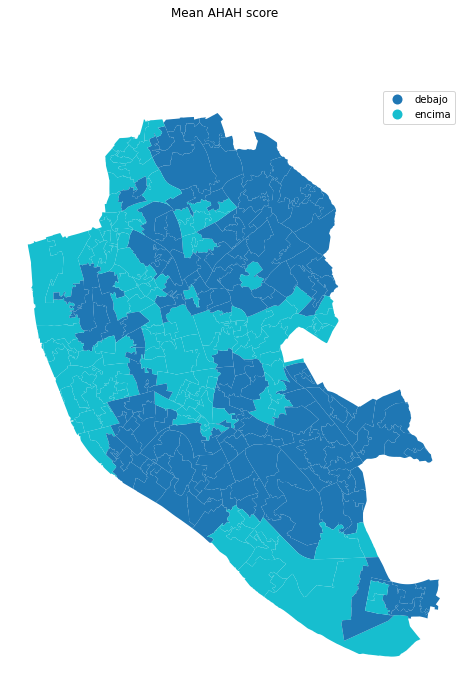

In [33]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("Mean AHAH score")
# Mostramos y editamos la representación de los elementos a mapear
ahah.plot(column="encima_debajo", 
        legend=True,
        ax=ax,) # donde se ubica la información
# Agregamos mapa base
# cx.add_basemap(ax, crs=liv.crs, source=cx.providers.Stamen.Watercolor);
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()